In [1]:
from collections import defaultdict 
import pandas as pd
import numpy as np

In [2]:
C_enz = ((0.5*1.5e-3/(65*1e6))/(1.25*1e-3)) * 1e6
print(f'Концентрация фермента в реакционной ячейке (М): {C_enz}')

Концентрация фермента в реакционной ячейке (М): 0.00923076923076923


In [3]:
xls = '2020_практикум-2_302_Смородина.xls'

df = pd.read_excel(xls)
df = df.replace('--', np.nan) # to use more than 200 rows
df = df.loc[1:]

In [4]:
df.tail(10)

,"ABTS, 100 мкМ",Unnamed: 1,"ABTS, 208 мкМ",Unnamed: 3,"ABTS, 524 мкМ",Unnamed: 5
2892,NaN,NaN,NaN,NaN,NaN,NaN
2893,NaN,NaN,NaN,NaN,NaN,NaN
2894,NaN,NaN,NaN,NaN,NaN,NaN
2895,NaN,NaN,NaN,NaN,NaN,NaN
2896,NaN,NaN,NaN,NaN,NaN,NaN
2897,NaN,NaN,NaN,NaN,NaN,NaN
2898,NaN,NaN,NaN,NaN,NaN,NaN
2899,NaN,NaN,NaN,NaN,NaN,NaN
2900,NaN,NaN,NaN,NaN,NaN,NaN
2901,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.fillna(0)
df.tail(10)

,"ABTS, 100 мкМ",Unnamed: 1,"ABTS, 208 мкМ",Unnamed: 3,"ABTS, 524 мкМ",Unnamed: 5
2892,0.0,0.0,0.0,0.0,0.0,0.0
2893,0.0,0.0,0.0,0.0,0.0,0.0
2894,0.0,0.0,0.0,0.0,0.0,0.0
2895,0.0,0.0,0.0,0.0,0.0,0.0
2896,0.0,0.0,0.0,0.0,0.0,0.0
2897,0.0,0.0,0.0,0.0,0.0,0.0
2898,0.0,0.0,0.0,0.0,0.0,0.0
2899,0.0,0.0,0.0,0.0,0.0,0.0
2900,0.0,0.0,0.0,0.0,0.0,0.0
2901,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
K = [np.float(col.split()[1].replace(',','.')) for col in df if col.startswith('ABTS')]
t = [col for col in df if col.startswith('ABTS')]
s = [col for col in df if col.startswith('Unnamed')]
T = df[t].to_numpy()
S = df[s].to_numpy()

d = defaultdict(dict)

for i in enumerate(K):
    for j in zip(T, S):
        d[i[1]].update({j[0][i[0]]:j[1][i[0]]})

In /home/eva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/eva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/eva/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


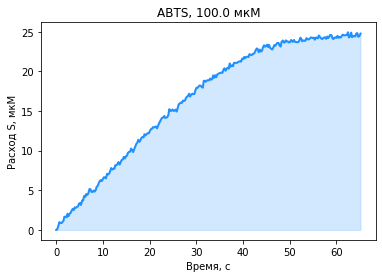

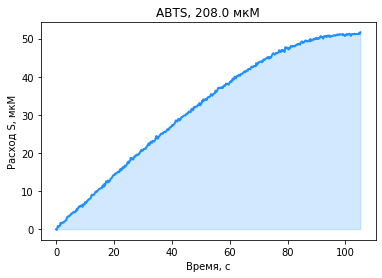

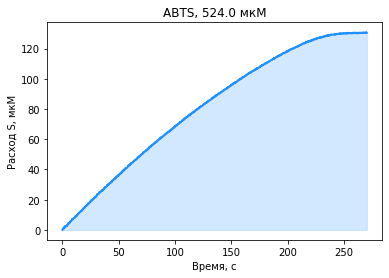

In [7]:
import matplotlib.pyplot as plt

for i in d:
    plt.title(f'ABTS, {i} мкМ')
    plt.xlabel('Время, с')
    plt.ylabel('Расход S, мкМ')
    plt.plot(list(d[i].keys()), list(d[i].values()), linewidth=2, color = 'dodgerblue')
    plt.fill_between(list(d[i].keys()), list(d[i].values()), alpha = 0.2, color = 'dodgerblue')
    plt.show()

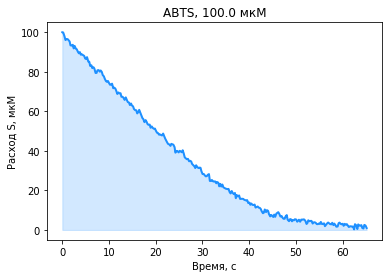

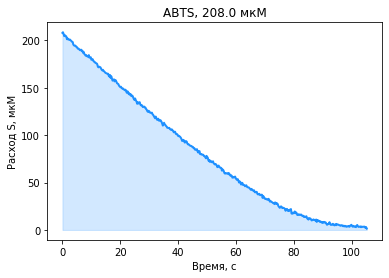

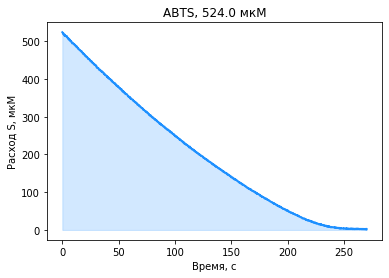

In [8]:
for i in d:
    plt.title(f'ABTS, {i} мкМ')
    plt.xlabel('Время, с')
    plt.ylabel('Расход S, мкМ')
    plt.plot(list(d[i].keys()), i - 4 * np.array(list(d[i].values())), linewidth=2, color = 'dodgerblue')
    plt.fill_between(list(d[i].keys()), i - 4 * np.array(list(d[i].values())), alpha = 0.2, color = 'dodgerblue')
    plt.show()

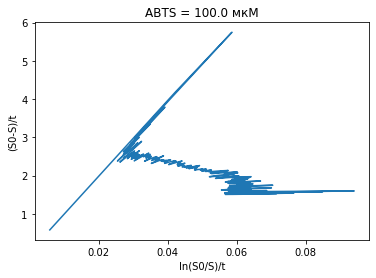

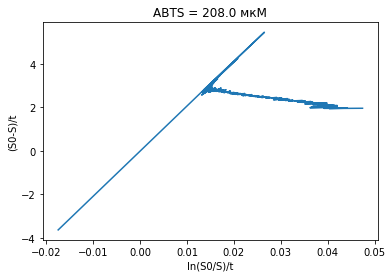

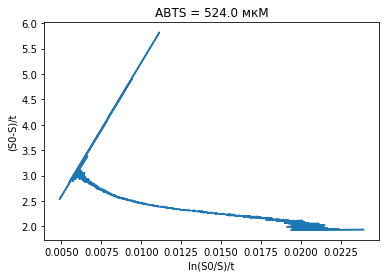

In [9]:
d_s = {x: [None, None] for x in d.keys()}

for key in d_s:
    d_s[key][0] = np.array(list(d[key].keys())[1:])
    d_s[key][1] = np.array(list(d[key].values())[1:])
    d_s[key][1] = key - d_s[key][1] * 4
    
d_smidt = {x: [np.log(x / d_s[x][1]) / d_s[x][0], (x - d_s[x][1]) / d_s[x][0]] for x in d.keys()}

for key in d_smidt:
    plt.title(f"ABTS = {key} мкМ")
    plt.xlabel("ln(S0/S)/t")
    plt.ylabel("(S0-S)/t")
    plt.plot(d_smidt[key][0], d_smidt[key][1])
    plt.show()

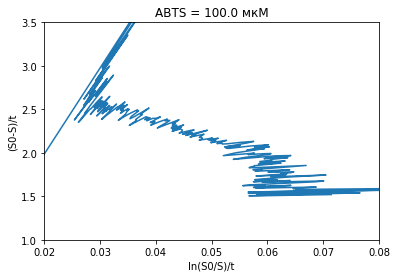

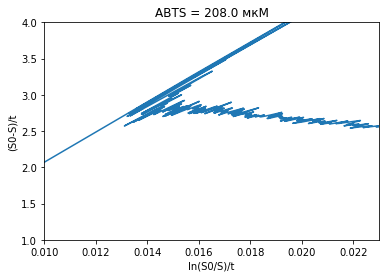

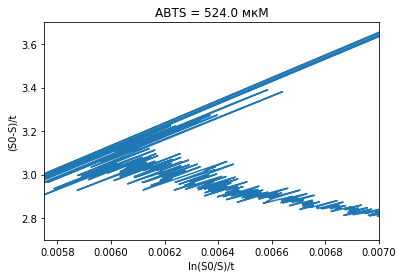

In [10]:
d_smidt = {x: [np.log(x / d_s[x][1]) / d_s[x][0], (x - d_s[x][1]) / d_s[x][0]] for x in d.keys()}
ylims = [(1, 3.5), (1, 4), (2.7, 3.7)]
xlims = [(0.02, 0.08), (0.01, 0.023), (0.00575, 0.007)]

for i, key in enumerate(d_smidt):
    plt.title(f"ABTS = {key} мкМ")
    plt.xlabel("ln(S0/S)/t")
    plt.ylabel("(S0-S)/t")
    plt.plot(d_smidt[key][0], d_smidt[key][1])
    plt.ylim(ylims[i])
    plt.xlim(xlims[i])
    plt.show()

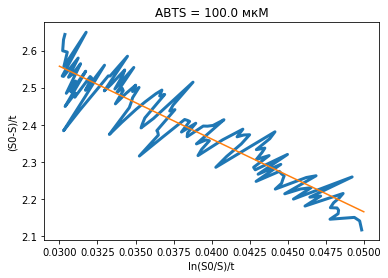

Vm: 3.1462 мкМ/сек; Km: 19.614 мкМ; r-squared = 0.83


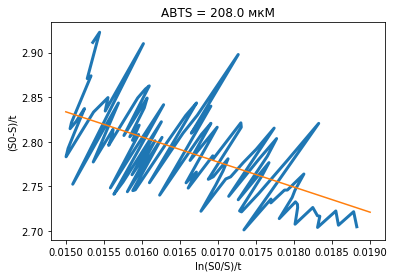

Vm: 3.2557 мкМ/сек; Km: 28.1389 мкМ; r-squared = 0.34


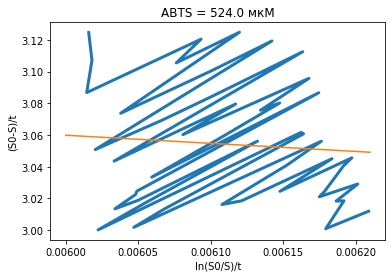

Vm: 3.3662 мкМ/сек; Km: 51.0552 мкМ; r-squared = 0.01


In [11]:
from sklearn.linear_model import LinearRegression

stoichiometric = 4
intervals = {x: list() for x in d.keys()}

# min_x, max_x, min_y, min_y
intervals[100.0] = 0.03, 0.05, 1.5, 2.8
intervals[208.0] = 0.015, 0.019, 2.7, 3.0
intervals[524.0] = 0.006, 0.00621, 3.0, 3.15

linear_results = {x: {'Vm':0, 'Km':0} for x in d.keys()}

for key in d_smidt:
    x, y = d_smidt[key]
    ints = intervals[key]

    x, y = (x[np.logical_and.reduce((x > ints[0], x < ints[1], y > ints[2], y < ints[3]))],
           y[np.logical_and.reduce((x > ints[0], x < ints[1], y > ints[2], y < ints[3]))])
    x = x.reshape((-1,1))

    model = LinearRegression()
    model.fit(x, y)
    r_sq = model.score(x, y)
    k = model.coef_[0]
    b = model.intercept_
    linear_results[key]['Km'] = -k 
    linear_results[key]['Vm'] = b
    x_lin = np.linspace(intervals[key][0], intervals[key][1], 100)
    y_lin = k * x_lin + b
    plt.plot(x, y, linewidth=3)
    plt.plot(x_lin, y_lin, linestyle='-')
    plt.title(f"ABTS = {key} мкМ")
    plt.xlabel("ln(S0/S)/t")
    plt.ylabel("(S0-S)/t")
    plt.show()
    print(f"Vm: {round(linear_results[key]['Vm'], 4)} мкМ/сек; Km: {round(linear_results[key]['Km'], 4)} мкМ; r-squared = {round(r_sq, 2)}")

In [18]:
d_s

{100.0: [array([ 0.187,  0.437,  0.687,  0.875,  1.156,  1.359,  1.562,  1.75 ,
          2.   ,  2.25 ,  2.437,  2.64 ,  2.906,  3.093,  3.359,  3.562,
          3.765,  3.968,  4.234,  4.437,  4.687,  4.89 ,  5.093,  5.297,
          5.562,  5.765,  5.968,  6.234,  6.422,  6.672,  6.859,  7.125,
          7.328,  7.531,  7.781,  8.031,  8.218,  8.468,  8.656,  8.906,
          9.093,  9.343,  9.531,  9.781, 10.031, 10.218, 10.468, 10.656,
         10.906, 11.093, 11.343, 11.531, 11.781, 12.031, 12.218, 12.468,
         12.656, 12.906, 13.156, 13.343, 13.593, 13.843, 14.031, 14.281,
         14.468, 14.718, 14.906, 15.156, 15.343, 15.593, 15.843, 16.031,
         16.281, 16.468, 16.718, 16.906, 17.156, 17.343, 17.593, 17.843,
         18.031, 18.281, 18.468, 18.718, 18.906, 19.156, 19.343, 19.593,
         19.843, 20.031, 20.281, 20.468, 20.718, 20.906, 21.156, 21.343,
         21.593, 21.781, 22.031, 22.218, 22.468, 22.656, 22.906, 23.156,
         23.343, 23.593, 23.781, 24.031, 24.

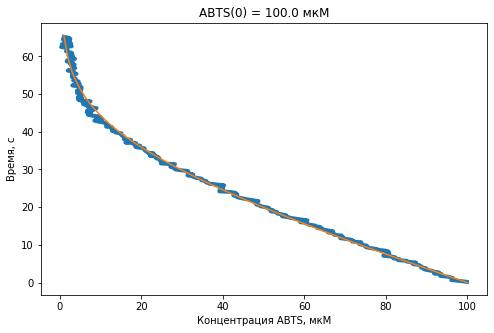

Vm: 3.463 мкМ/сек; Km: 27.4983 мкМ; r-squared = 0.99


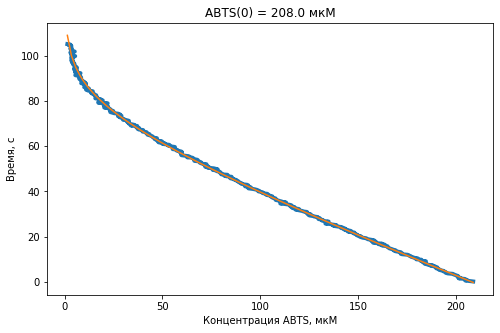

Vm: 3.2761 мкМ/сек; Km: 30.2013 мкМ; r-squared = 1.0


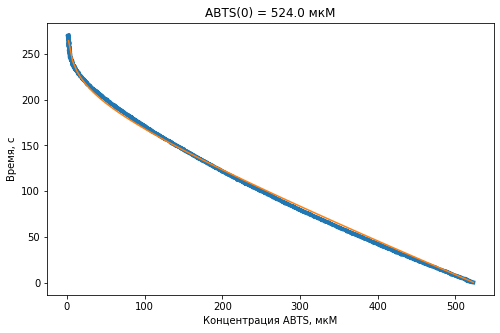

Vm: 3.0168 мкМ/сек; Km: 50.2262 мкМ; r-squared = 1.0


In [12]:
from scipy.optimize import curve_fit

def getRS(f, x, y, params):
    residuals = y - f(x, *params)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    return 1 - (ss_res / ss_tot)

def timeFunc(S0):
    def func(S, Km, Vm):
        return (Km / Vm) * np.log(S0 / S) + (1 / Vm) * (S0 - S)
    return func

nonlinear_results = {x: {'Vm':0, 'Km':0} for x in d.keys()}

for key in d_s:
    x, y = d_s[key][0], d_s[key][1]
    params = curve_fit(timeFunc(key), y, x, maxfev=15000)[0]
    Vm = params[1] 
    Km = params[0] 
    nonlinear_results[key]['Vm'], nonlinear_results[key]['Km'] = Vm / 4, Km 
    r_sq = getRS(timeFunc(key), y, x, params)
    y_model = np.linspace(y[0], y[-1], 100)
    x_model = timeFunc(key)(y_model, Km, Vm)
    
    plt.figure(figsize = (8,5))
    plt.title(f"ABTS(0) = {key} мкМ")
    plt.ylabel("Время, с")
    plt.xlabel("Концентрация ABTS, мкМ")
        
    plt.plot(y, x, linewidth=4)
    plt.plot(y_model, x_model, linestyle='-')
    plt.show()
    
    print(f"Vm: {round(Vm, 4)} мкМ/сек; Km: {round(Km, 4)} мкМ; r-squared = {round(r_sq, 2)}")
    #print(f"Vm: {np.format_float_scientific(Vm, precision=2)} мкМ/сек; Km: {np.format_float_scientific(Km, precision=2)} мкМ; r-squared = {round(r_sq, 2)}")

55.797-65.172


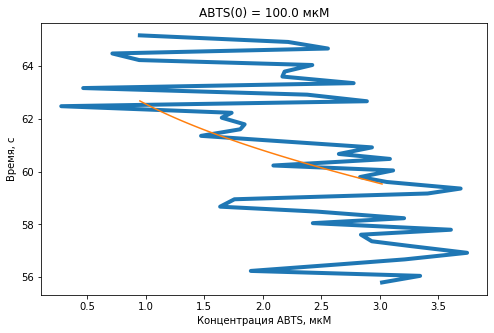

Vm: 1.8149 мкМ/сек; Km: 3.1603 мкМ; r-squared = 0.29
55.797-105.187


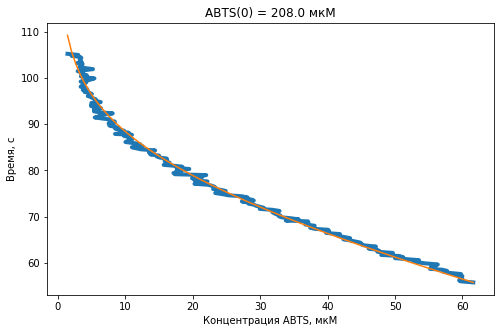

Vm: 3.2917 мкМ/сек; Km: 30.6279 мкМ; r-squared = 0.99
55.813-270.188


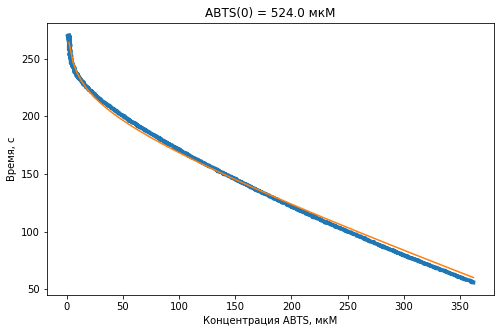

Vm: 3.0016 мкМ/сек; Km: 49.3174 мкМ; r-squared = 1.0


In [58]:
from scipy.optimize import curve_fit

def getRS(f, x, y, params):
    residuals = y - f(x, *params)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y-np.mean(y))**2)
    return 1 - (ss_res / ss_tot)

def timeFunc(S0):
    def func(S, Km, Vm):
        return (Km / Vm) * np.log(S0 / S) + (1 / Vm) * (S0 - S)
    return func

nonlinear_results = {x: {'Vm':0, 'Km':0} for x in d.keys()}

for key in d_s:
    x, y = d_s[key][0], d_s[key][1]
    x, y = x[250:], y[250:]
    print(str(min(x)) + '-' + str(max(x)))
    params = curve_fit(timeFunc(key), y, x, maxfev=15000)[0]
    Vm = params[1] 
    Km = params[0] 
    nonlinear_results[key]['Vm'], nonlinear_results[key]['Km'] = Vm / 4, Km 
    r_sq = getRS(timeFunc(key), y, x, params)
    y_model = np.linspace(y[0], y[-1], 100)
    x_model = timeFunc(key)(y_model, Km, Vm)
    
    plt.figure(figsize = (8,5))
    plt.title(f"ABTS(0) = {key} мкМ")
    plt.ylabel("Время, с")
    plt.xlabel("Концентрация ABTS, мкМ")
        
    plt.plot(y, x, linewidth=4)
    plt.plot(y_model, x_model, linestyle='-')
    plt.show()
    
    print(f"Vm: {round(Vm, 4)} мкМ/сек; Km: {round(Km, 4)} мкМ; r-squared = {round(r_sq, 2)}")
    #print(f"Vm: {np.format_float_scientific(Vm, precision=2)} мкМ/сек; Km: {np.format_float_scientific(Km, precision=2)} мкМ; r-squared = {round(r_sq, 2)}")

In [13]:
import numpy as np

def Y(S0, S, t):
    return np.float((S0 - S) / t)
def X(S0, S, t):
    return np.float(np.log(S0 / S) / t)

In [14]:
S0 = 524
#S = S0 - 4 * 100
S = 1
t = 275

print(X(S0, S, t))
print(Y(S0, S, t))

0.022769060670258336
1.9018181818181819


In [15]:
S

1

In [16]:
np.ln(S0 / S)

AttributeError: module 'numpy' has no attribute 'ln'

In [ ]:
(79-30)/20


In [ ]:
1000/41.5

In [ ]:
0.08 - 0.05

In [ ]:
2.0-1.25

In [ ]:
0.75/0.03

In [ ]:
(200-175)

In [ ]:
175 + 13

In [ ]:
175-12

In [ ]:
100-12.5

In [ ]:
75-12

In [ ]:
50-13

In [ ]:
25-12.5

In [ ]:
12.5/2

In [ ]:
12.5-6

In [ ]:
3.55-3

In [ ]:
0.01+0.004

In [ ]:
3.55-3

In [ ]:
0.55/0.014

In [ ]:
0.005/2

In [ ]:
0.005+0.01

In [ ]:
0.015+0.0025

In [ ]:
0.0175-0.0025

In [ ]:
3.25-2.0

In [ ]:
1.25/0.015

In [46]:
a = [1,2,3,4,5,6,7]

In [47]:
a[:-2]

[1, 2, 3, 4, 5]